In [13]:
import pandas as pd
import os
from tqdm.auto import tqdm

In [11]:
dataset_folder_path = r'D:\Projects\CDS\Capstone Project\UECFOOD100'

In [42]:
def get_category_wise_image_paths(dataset_folder_path, n_categories):
    ingredient_categories = list(range(1, n_categories+1)) 
    return {
        ingredient: [
            os.path.join(dataset_folder_path, str(ingredient), image_path)
            for image_path in os.listdir(os.path.join(dataset_folder_path, str(ingredient))) 
            if image_path.split('.')[-1] != 'txt'
        ] 
        for ingredient in ingredient_categories
    }

def get_encoded_image(image_path):
    with open(image_path, 'rb') as img_file:
        image_bytes = img_file.read()
    return image_bytes

def build_dataframe(dataset_folder_path, n_categories=100):
    category_wise_image_paths = get_category_wise_image_paths(dataset_folder_path, n_categories)

    data_dict = {
        'ingredient_category': [],
        'image_bytes': [],
        'x1': [],
        'y1': [],
        'x2': [],
        'y2': []
    }
    for ingredient, image_paths in tqdm(category_wise_image_paths.items()):
        bb_data = pd.read_csv(os.path.join(dataset_folder_path, str(ingredient), 'bb_info.txt'), sep=' ')
        for image_path in image_paths:
            image_name = int(image_path.split('.')[0].split('\\')[-1])
            image_bytes = get_encoded_image(image_path)
            data_dict['ingredient_category'].append(ingredient)
            data_dict['image_bytes'].append(image_bytes)
            if bb_data[bb_data['img'] == image_name].shape[0] == 0:
                data_dict['x1'].append(0)
                data_dict['y1'].append(0)
                data_dict['x2'].append(0)
                data_dict['y2'].append(0)
            else:
                data_dict['x1'].append(bb_data[bb_data['img'] == image_name]['x1'].values[0])
                data_dict['y1'].append(bb_data[bb_data['img'] == image_name]['y1'].values[0])
                data_dict['x2'].append(bb_data[bb_data['img'] == image_name]['x2'].values[0])
                data_dict['y2'].append(bb_data[bb_data['img'] == image_name]['y2'].values[0])

    return pd.DataFrame.from_dict(data_dict)

In [43]:
image_df = build_dataframe(dataset_folder_path)

  0%|          | 0/100 [00:00<?, ?it/s]

In [44]:
image_df

,ingredient_category,image_bytes,x1,y1,x2,y2
0,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,0,143,370,486
1,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,71,16,478,328
2,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,0,49,360,420
3,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,19,69,355,372
4,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,0,4,91,246
...,...,...,...,...,...,...
14356,100,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,39,58,328,220
14357,100,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,4,11,166,92
14358,100,b'\xff\xd8\xff\xe1\x03\x88Exif\x00\x00II*\x00\...,0,0,299,175
14359,100,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,456,125,800,351


In [50]:
category_names = pd.read_csv(os.path.join(dataset_folder_path, 'category.txt'), sep='\t')
image_df = pd.merge(image_df, category_names, left_on='ingredient_category', right_on='id', how='inner').drop('id', axis=1)
image_df = image_df[['ingredient_category', 'name', 'image_bytes', 'x1', 'y1', 'x2', 'y2']]
image_df

,ingredient_category,name,image_bytes,x1,y1,x2,y2
0,1,rice,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,0,143,370,486
1,1,rice,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,71,16,478,328
2,1,rice,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,0,49,360,420
3,1,rice,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,19,69,355,372
4,1,rice,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,0,4,91,246
...,...,...,...,...,...,...,...
14356,100,goya chanpuru,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,39,58,328,220
14357,100,goya chanpuru,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,4,11,166,92
14358,100,goya chanpuru,b'\xff\xd8\xff\xe1\x03\x88Exif\x00\x00II*\x00\...,0,0,299,175
14359,100,goya chanpuru,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,456,125,800,351


In [51]:
image_df.to_pickle(os.path.join(dataset_folder_path, 'images.pkl'))

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import io
import base64

# Plotting function
def show_images_with_bboxes(df):
    num_images = len(df)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

    # Ensure axes is iterable even for a single image
    if num_images == 1:
        axes = [axes]

    for idx, row in df.iterrows():
        image_bytes = row['image_bytes']

        # Decode base64 if the image is stored as string
        if isinstance(image_bytes, str):
            image_bytes = base64.b64decode(image_bytes)

        # Open image from bytes
        image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

        ax = axes[idx]
        ax.imshow(image)

        # Draw bounding box
        x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Label title
        ax.set_title(f"{row['name']}", fontsize=14)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7400\3435601847.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = image_df.groupby('ingredient_category').apply(lambda x: x.sample(1)).reset_index(drop=True).head(5)


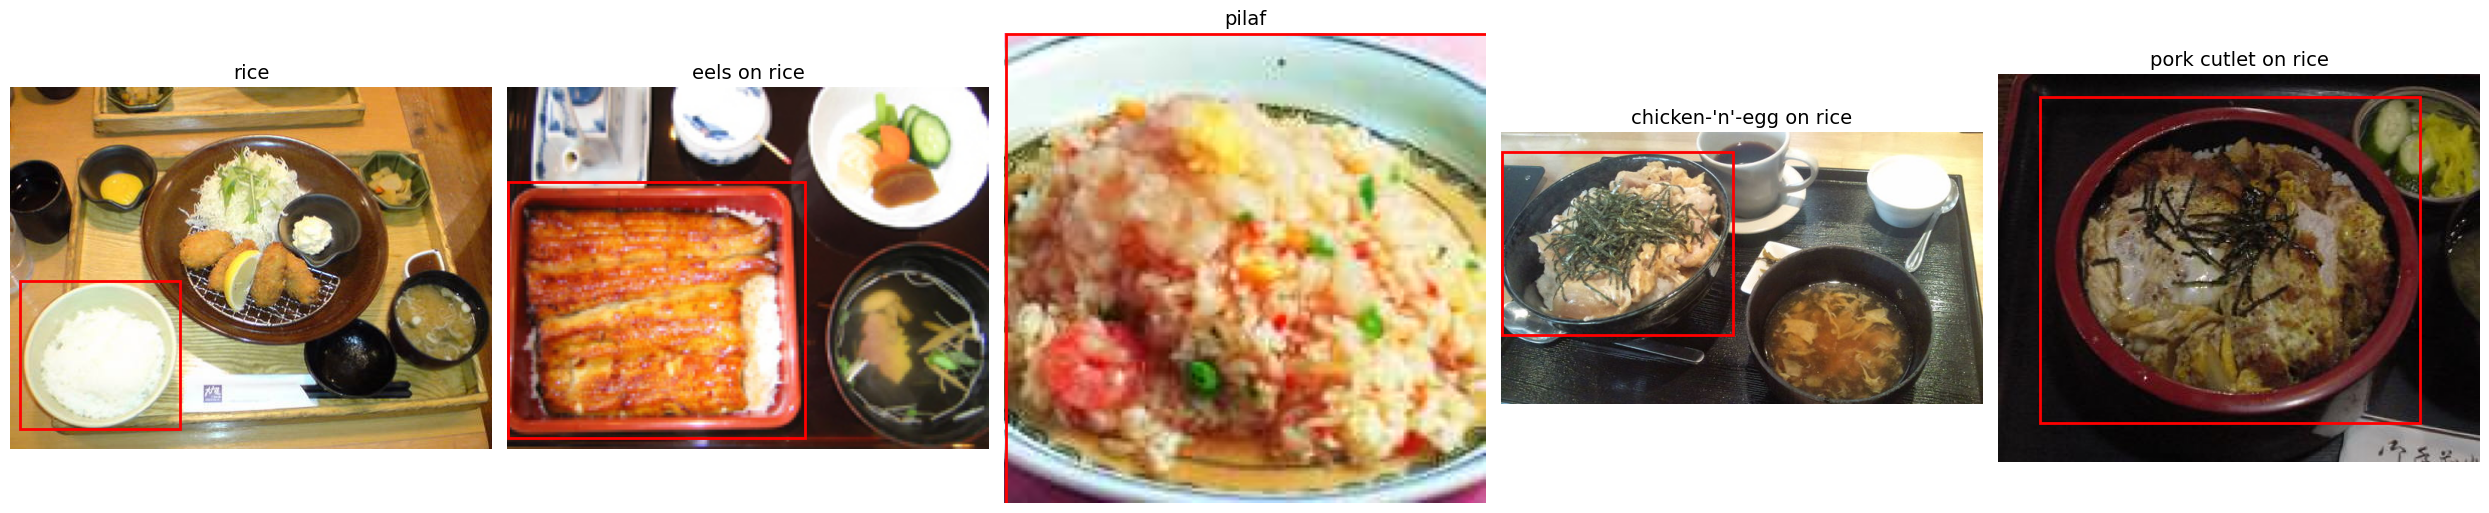

In [67]:
sampled_df = image_df.groupby('ingredient_category').apply(lambda x: x.sample(1)).reset_index(drop=True).head(5)
show_images_with_bboxes(sampled_df)